<a href="https://colab.research.google.com/github/AlbertoPS93/Finance/blob/main/correlacion_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importando paquetes
import numpy as np
import pandas as pd
import datetime as dt

from pandas_datareader import data as pdr
import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt

El objetivo es crear una matriz de correlación sobre la rentabilidad de varios ETFs famosos representada con un mapa de calor. Después he ampliado el trabajocon una representación de la correlación móvil a 60 días entre dos de los ETFs (el del S&P 500 y el del bono americano a 20 años). También he añadido un Clustermap de Correlación de Activos sobre la misma matriz inicial para representarlos agrupados.

In [2]:
pip install yfinance

In [3]:
# estableciendo rango de fecha
start = dt.datetime(2015,1,1)
end = dt.datetime.now()

In [4]:
# etfs a utilizar
etflist = ['SPY', 'TLT', 'GLD', 'QQQ', 'IWM', 'EEM', 'IEF', 'USO', 'DIA', 'MCHI','FEZ']
print(etflist)

['SPY', 'TLT', 'GLD', 'QQQ', 'IWM', 'EEM', 'IEF', 'USO', 'DIA', 'MCHI', 'FEZ']


In [5]:
# obteniendo datos desde yahoo finance
data = yf.download(etflist, start=start, end=end)
close_price = data['Close']
close_price.tail(3)

/tmp/ipython-input-2624804055.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(etflist, start=start, end=end)
[*********************100%***********************]  11 of 11 completed


Ticker,DIA,EEM,FEZ,GLD,IEF,IWM,MCHI,QQQ,SPY,TLT,USO
Date,,,,,,,,,,,
2025-10-16,459.404999,54.189999,62.740002,396.450012,97.550003,245.059998,63.400002,599.989990,660.640015,91.339996,67.809998
2025-10-17,461.779999,54.180000,62.919998,388.989990,97.389999,243.410004,63.310001,603.929993,664.390015,91.199997,67.980003
2025-10-20,467.379913,54.994999,63.375000,400.019989,97.459999,248.279999,64.199997,612.700012,672.155029,91.430099,67.680000


In [6]:
close_price.shape

(2716, 11)

In [7]:
# verificando datos NaN
close_price.isnull().sum()

,0
Ticker,
DIA,0
EEM,0
FEZ,0
GLD,0
IEF,0
IWM,0
MCHI,0
QQQ,0
SPY,0


In [8]:
# cálculo de la variación procentual
change_price = close_price.pct_change().dropna()
change_price.tail(3)

Ticker,DIA,EEM,FEZ,GLD,IEF,IWM,MCHI,QQQ,SPY,TLT,USO
Date,,,,,,,,,,,
2025-10-16,-0.006808,0.006501,0.009006,0.023387,0.004634,-0.021052,0.002372,-0.003703,-0.006810,0.007500,-0.017104
2025-10-17,0.005170,-0.000185,0.002869,-0.018817,-0.001640,-0.006733,-0.001420,0.006567,0.005676,-0.001533,0.002507
2025-10-20,0.012127,0.015042,0.007231,0.028355,0.000719,0.020007,0.014058,0.014522,0.011687,0.002523,-0.004413


In [9]:
# reordenando las columnas para dejar al SPY en la primera, SPY es el índice más famoso de los tratados.
change_price = change_price[['SPY', 'TLT', 'GLD', 'QQQ', 'IWM', 'EEM', 'IEF', 'USO', 'DIA', 'MCHI','FEZ']]
change_price

Ticker,SPY,TLT,GLD,QQQ,IWM,EEM,IEF,USO,DIA,MCHI,FEZ
Date,,,,,,,,,,,
2015-01-05,-0.018060,0.015708,0.015077,-0.014669,-0.013369,-0.017797,0.006102,-0.055304,-0.017421,-0.001393,-0.042628
2015-01-06,-0.009419,0.018017,0.011399,-0.013408,-0.017300,-0.004202,0.006718,-0.039383,-0.008293,-0.009563,-0.011344
2015-01-07,0.012461,-0.001975,-0.005891,0.012891,0.012315,0.021625,-0.000186,0.017729,0.012688,0.025548,0.011761
2015-01-08,0.017745,-0.013243,-0.004209,0.019139,0.016962,0.017037,-0.004078,0.009798,0.018054,0.010004,0.015027
2015-01-09,-0.008014,0.010953,0.011385,-0.006583,-0.009604,-0.003299,0.004933,-0.014555,-0.008615,-0.003301,-0.015084
...,...,...,...,...,...,...,...,...,...,...,...
2025-10-14,-0.001222,0.003202,0.007141,-0.006661,0.014279,-0.008980,0.002578,-0.018213,0.004407,-0.011374,0.006328
2025-10-15,0.004440,-0.002201,0.017332,0.007057,0.009802,0.016424,-0.001132,-0.000145,0.000000,0.010706,0.002580
2025-10-16,-0.006810,0.007500,0.023387,-0.003703,-0.021052,0.006501,0.004634,-0.017104,-0.006808,0.002372,0.009006


In [10]:
# matriz de correlación
corr = change_price.corr()
corr

Ticker,SPY,TLT,GLD,QQQ,IWM,EEM,IEF,USO,DIA,MCHI,FEZ
Ticker,,,,,,,,,,,
SPY,1.000000,-0.187442,0.042077,0.933723,0.867885,0.753122,-0.162253,0.309709,0.951190,0.536661,0.797633
TLT,-0.187442,1.000000,0.291817,-0.133367,-0.165883,-0.141848,0.916335,-0.192708,-0.222367,-0.109387,-0.163837
GLD,0.042077,0.291817,1.000000,0.050926,0.041826,0.165884,0.366890,0.086080,0.019463,0.104718,0.104921
QQQ,0.933723,-0.133367,0.050926,1.000000,0.769877,0.721759,-0.116060,0.227319,0.818646,0.557719,0.710819
IWM,0.867885,-0.165883,0.041826,0.769877,1.000000,0.693154,-0.141349,0.297826,0.849739,0.501866,0.745045
EEM,0.753122,-0.141848,0.165884,0.721759,0.693154,1.000000,-0.115699,0.328188,0.719905,0.854299,0.777315
IEF,-0.162253,0.916335,0.366890,-0.116060,-0.141349,-0.115699,1.000000,-0.176847,-0.194716,-0.100215,-0.131289
USO,0.309709,-0.192708,0.086080,0.227319,0.297826,0.328188,-0.176847,1.000000,0.321059,0.218546,0.286156
DIA,0.951190,-0.222367,0.019463,0.818646,0.849739,0.719905,-0.194716,0.321059,1.000000,0.492999,0.785235


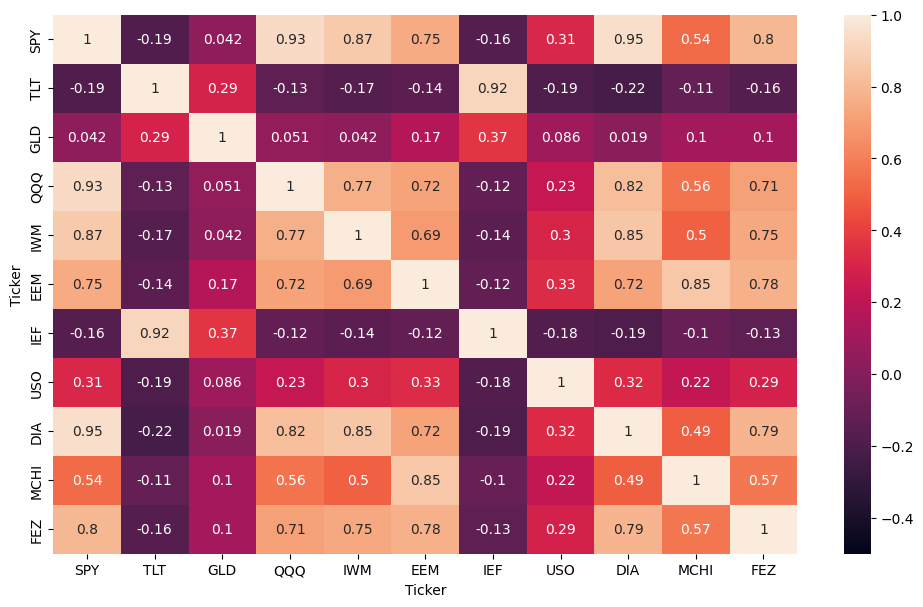

In [11]:
# representación gráfica
plt.figure(figsize=(12, 7))
sns.heatmap(corr,
            vmax=1, vmin=-.5,
            fmt='.2g',
            annot=True);

In [12]:
# Implementando rolling window correlation para estudiar cómo varían las relaciones en el tiempo 1. Lista de tickers
tickers = ['SPY','TLT', 'GLD', 'QQQ', 'IWM', 'EEM', 'IEF', 'USO', 'DIA', 'MCHI', 'FEZ']

# 2. Descarga de precios
all_data = yf.download(tickers, start='2018-01-01', end='2025-10-01')

# 3. Sección de "Close"
df = all_data['Close']

# 4. Cálculo de retornos (ahora funcionará sin error)
returns = df.pct_change().dropna()

# 5. Imprimiendo las primeras filas para verificar
print("Precios de Cierre (ya ajustados):")
print(df.head())

print("\nRetornos calculados:")
print(returns.head())

/tmp/ipython-input-744508998.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  all_data = yf.download(tickers, start='2018-01-01', end='2025-10-01')
[*********************100%***********************]  11 of 11 completed

Precios de Cierre (ya ajustados):
Ticker             DIA        EEM        FEZ         GLD        IEF  \
Date                                                                  
2018-01-02  213.520248  40.555492  32.810196  125.150002  88.331825   
2018-01-03  214.320908  40.944061  32.938568  124.820000  88.424141   
2018-01-04  215.741241  41.146809  33.524345  125.459999  88.382172   
2018-01-05  217.566452  41.501591  33.861347  125.330002  88.273033   
2018-01-08  217.454514  41.501591  33.724934  125.309998  88.231064   

Ticker             IWM       MCHI         QQQ         SPY         TLT  \
Date                                                                    
2018-01-02  139.598022  60.221489  150.605377  237.909149  101.690491   
2018-01-03  139.743179  60.700607  152.068741  239.413956  102.176712   
2018-01-04  140.115051  61.075207  152.334793  240.423080  102.160500   
2018-01-05  140.405304  61.510765  153.864700  242.025284  101.868790   
2018-01-08  140.623077  61.815

In [13]:
# 1. Descarga de precios
tickers = ['SPY', 'EFA', 'IWM', 'TLT']
df = yf.download(tickers, start='2018-01-01', end='2025-10-18')['Close']

# 2. Cálculo de retornos
returns = df.pct_change().dropna()


/tmp/ipython-input-454492578.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start='2018-01-01', end='2025-10-18')['Close']
[*********************100%***********************]  4 of 4 completed


In [14]:
window = 60  # Ventana de 60 días

# Correlación móvil SPY vs TLT
rolling_pair = (
    returns['SPY']
    .rolling(window=window)
    .corr(returns['TLT'])
)

In [15]:
window = 60

# DataFrame con índice (fecha, ticker1) y columna ticker2
rolling_full = returns.rolling(window=window).corr()

# Para convertirlo en un panel fecha × par de tickers:
rolling_matrix = (
    rolling_full
    .unstack(level=-1)                # convierte columnas de multiíndice en columnas planas
    .dropna(axis=0, how='all')        # elimina fechas sin datos completos
)

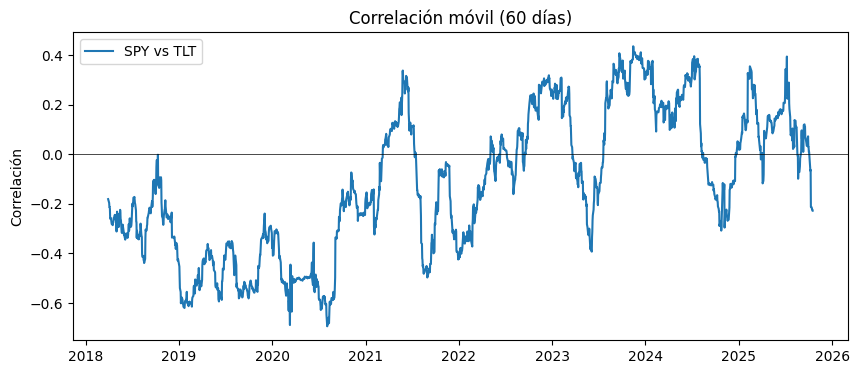

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(rolling_pair.index, rolling_pair.values, label='SPY vs TLT')
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Correlación móvil (60 días)')
plt.ylabel('Correlación')
plt.legend()
plt.show()

<Figure size 1000x1000 with 0 Axes>

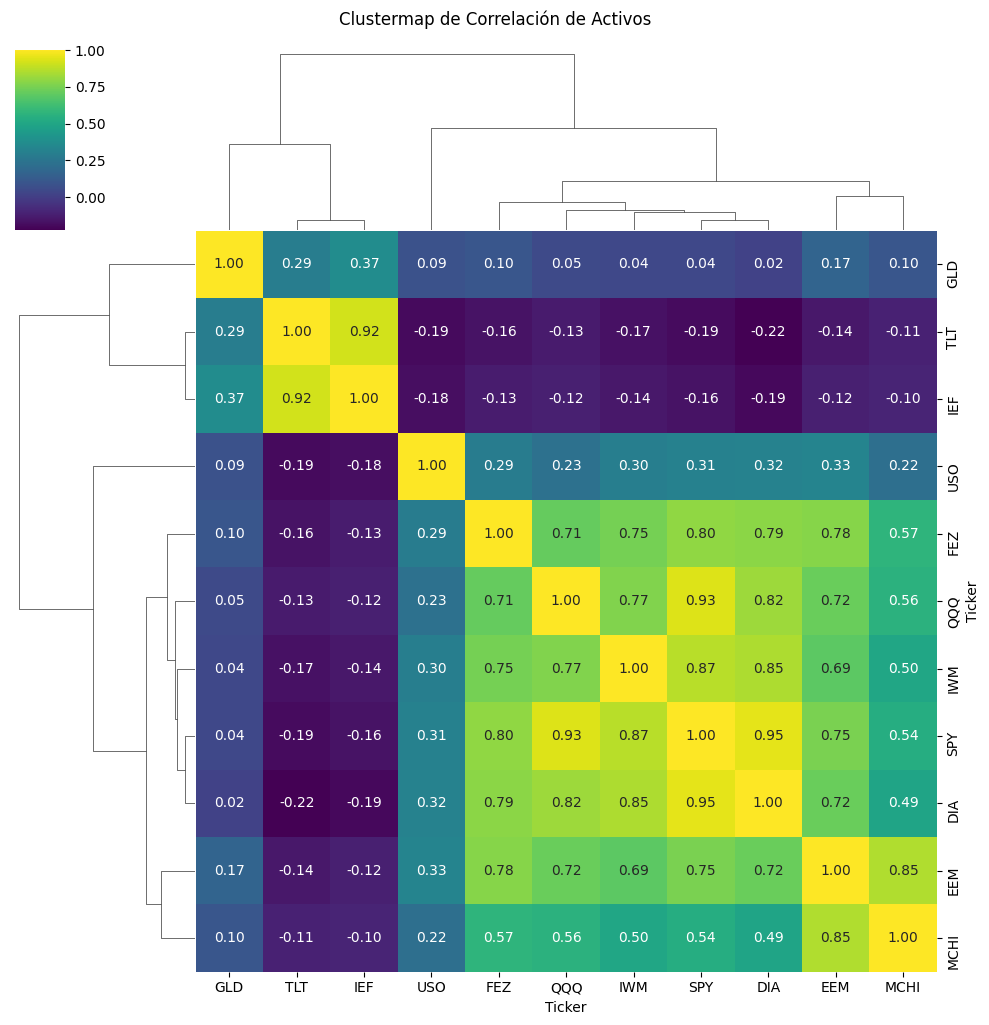

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Uso la misma matriz de correlación
plt.figure(figsize=(10, 10))
sns.clustermap(
    corr,
    annot=True,       # Para mostrar los valores de correlación
    cmap='viridis',  # Busqué por google una paleta de colores diferente
    fmt='.2f'         # Formato de dos decimales
)
plt.suptitle('Clustermap de Correlación de Activos', y=1.02)
plt.show()